# 4.2 Multidimensional Scaling

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

Since that $\hat{p}(\mathbf{x})$ is actually the estimator of the probability of belonging or not belonging to the target population then conditioning the observed value to be 0 or 1, we obtain the random variables that have associated the distributions of the positives $f_{\hat{Y}|Y=1}(y)$ and negatives $f_{\hat{Y}|Y=0}(y)$. 

<img src='static/distributions.png' width="30%" height="30%">

For some fixed cut-off $c \in \mathbb{R}$ consider the following function: 

$$
T(\hat{Y};c) = 
     \begin{cases}
       \text{1} &\quad c \leq \hat{Y}\\
       \text{0} &\quad \hat{Y} < c \\
     \end{cases}
$$

The following probabilities are defined:
* *True Positive Rate (Recall or Sensitivity):* $P \left[ T(\hat{Y};c)=1|Y=1 \right]=P \left[ \hat{Y} \geq c |Y=1 \right] =1-F_{\hat{Y}|Y=1}(c)=\bar{F}_{\hat{Y}|Y=1}(c)$
* *True Negative Rate (Specificity or presicion):* $P \left[ T(\hat{Y};c)=0|Y=0 \right]=P \left[ \hat{Y} < c |Y=0 \right] =F_{Y|Y=0}(c)$
* *False Positive Rate (Miss Rate):* $P \left[ T(\hat{Y};c)=1|Y=0 \right]=P \left[ \hat{Y} \geq c |Y=0 \right] =1-F_{\hat{Y}|Y=0}(c)=\bar{F}_{\hat{Y}|Y=0}(c)$
* *False Negative Rate (Fall-Out):* $P \left[ T(\hat{Y};c)=0|Y=1 \right]=P \left[ \hat{Y} < c |Y=1 \right] =F_{Y|Y=1}(c)$

<img src='static/confusionMatrix.png' width="60%" height="60%">

## Receiver operating characteristic curve
___

The Receiver Operating Characteristic (ROC) curve was developed by engineers during World War II for detecting enemy objects in battlefields (Collison,1998). The ROC curve is defined at ROC space $[1,0]\times[1,0]$ 
in its parametric form as a plot of TPR versus 1−Specificity:

$$ROC_{curve} = \left \{ (\bar{F}_{\hat{Y}|Y=0}(c),\bar{F}_{\hat{Y}|Y=1}(c)) : c \in (-\infty,\infty) \ \right \}$$

**Proposition:** The ROC curve can be represented as a function of $t \in [0,1]$ as:
$$ROC(t) = 1-F_{\hat{Y}|Y=1}\left( F_{\hat{Y}|Y=0}^{-1} (1-t) \right) $$

**Proof:** Let $c = \bar{F}_{\hat{Y}|Y=0}^{-1} (t)$ so that $c$ is the cut-off value corresponding to the false positive rate $t \in [0,1]$, and hence:
$$
c = \bar{F}_{\hat{Y}|Y=0}^{-1} (t) \implies
\bar{F}_{\hat{Y}|Y=0}(c) = \bar{F}_{\hat{Y}|Y=0} \left( \bar{F}_{\hat{Y}|Y=0}^{-1} (t) \right) \implies
P[ \hat{Y} \geq c | Y=0] = t
$$

The corresponding true positive rate for the FPR $t$ is:

$$ P \left[ \hat{Y} \geq c |Y=1 \right]=\bar{F}_{\hat{Y}|Y=1}(c) $$

So, the point $(t,\bar{F}_{\hat{Y}|Y=1}(c))$ belongs to the ROC curve, but

$$
\begin{align*} 
\bar{F}_{\hat{Y}|Y=1}(c) &=  \bar{F}_{\hat{Y}|Y=1}(\bar{F}_{\hat{Y}|Y=0}^{-1} (t)) \\
&=  1-F_{\hat{Y}|Y=1}(\bar{F}_{\hat{Y}|Y=0}^{-1} (t)) \\
&=  1-F_{\hat{Y}|Y=1}(1-F_{\hat{Y}|Y=0}^{-1} (t)) \\
&=  1-F_{\hat{Y}|Y=1}(F_{\hat{Y}|Y=0}^{-1} (1-t)) \\
\end{align*}
$$

finally the ROC curve its given by:

$$ROC_{curve} = \left \{ (t,1-F_{\hat{Y}|Y=1}(F_{\hat{Y}|Y=0}^{-1} (1-t))) : t \in [0,1] \right \}$$

### ROC curve properties.

* The ROC curve is the function on $[0,1]$ such that $ROC(0)=$ and $ROC(1)=1$.
* The ROC curve slope matches with the likelihood ratio:
$$
\begin{align*} 
\frac{d}{dt} ROC(t) & =  \frac{d}{dt} \bar{F}_{\hat{Y}|Y=1}(\bar{F}_{\hat{Y}|Y=0}^{-1} (t))\\
&=  \bar{F}'_{\hat{Y}|Y=1}(\bar{F}_{\hat{Y}|Y=0}^{-1} (t)) \left[\bar{F}_{\hat{Y}|Y=0}^{-1} (t) \right]' \\
&=  -f_{\hat{Y}|Y=1}(\bar{F}_{\hat{Y}|Y=0}^{-1} (t)) \left[ \frac{1}{-f_{\hat{Y}|Y=0}(\bar{F}_{\hat{Y}|Y=0}^{-1} (t))} \right]\\
\frac{d}{dt} ROC(t) &= \frac{f_{\hat{Y}|Y=1}(\bar{F}_{\hat{Y}|Y=0}^{-1} (t))}{f_{\hat{Y}|Y=0}(\bar{F}_{\hat{Y}|Y=0}^{-1} (t))} = \frac{f_{\hat{Y}|Y=1}(c)}{f_{\hat{Y}|Y=0}(c)}\\
\end{align*}
$$
* The Roc curve is always monotonic, this is given due to the positive slope.

### Area under ROC curve (AUC)

The area under the curve (AUC) is the probability the model will score a randomly chosen positive class higher than a randomly chosen negative class.

**Proof**

Consider the independent random variables $\hat{Y_0}=\hat{p}(\mathbf{x_0})$ and $\hat{Y_1}=\hat{p}(\mathbf{x_1})$ s.t. $\mathbf{x_0} \in \Omega_0 and =\mathbf{x_1} \in \Omega_1$ so this random variables have associated the distributions $f_{\hat{Y}|Y=0}(\hat{y}_0)$ and $f_{\hat{Y}|Y=1}(\hat{y}_1)$ correspondingly, then te probability of $\hat{Y_0} < \hat{Y_1}$ could be computed using the joint probability distribution of both variables integrating over the interest region:

<img src='static/regionIntegracion.png' width="30%" height="30%">

$$
\begin{align*}
P \left[\hat{Y_0} < \hat{Y_1}\right] & = \int_{-\infty}^{\infty} \int_{\hat{y}_0}^{\infty} f_{\hat{Y}|Y=0,\hat{Y}|Y=1}(\hat{y}_0\hat{y}_1) d y_1 y_0  \\
& = \int_{-\infty}^{\infty}  \int_{\hat{y}_0}^{\infty} f_{\hat{Y}|Y=0}(\hat{y}_0) f_{\hat{Y}|Y=1}(\hat{y}_1) d y_1 d y_0  \\
& = \int_{-\infty}^{\infty}  \left(  \int_{\hat{y}_0}^{-\infty} f_{\hat{Y}|Y=1}(\hat{y}_1) d y_1 \right)  f_{\hat{Y}|Y=0}(\hat{y}_0) d y_0  \\
& = \int_{-\infty}^{\infty}  \bar{F}_{\hat{Y}|Y=1}(\hat{y}_0) f_{\hat{Y}|Y=0}(\hat{y}_0) d y_0 \dots (1) \\
\end{align*}
$$

Consider de following change of variable for $t \in [0,1]$:

$$ t = \bar{F}_{\hat{Y}|Y=0}(\hat{y}_0) \implies dt = f_{\hat{Y}|Y=0}(\hat{y}_0) d \hat{y}_0 \implies \bar{F}^{-1}_{\hat{Y}|Y=0}(t)=\hat{y}_0 $$

Substituting in (1) we have:

$$
\begin{align*}
\int_{-\infty}^{\infty}  \bar{F}_{\hat{Y}|Y=1}(\hat{y}_0) f_{\hat{Y}|Y=0}(\hat{y}_0) d y_0 \dots (1) & = \int_{0}^{1}  \bar{F}_{\hat{Y}|Y=1}(\bar{F}^{-1}_{\hat{Y}|Y=0}(t)) dt  \\
P \left[\hat{Y_0} < \hat{Y_1}\right] & = \int_{0}^{1}  ROC(t) dt = AUC\\
\end{align*}
$$

### The binormal model

If $\hat{Y}|Y=0 \sim N(\mu_0,\sigma_0)$ and $\hat{Y}|Y=1 \sim N(\mu_1, \sigma_1)$, then:

* $ROC(t)=\Phi\left(\frac{\mu_1-\mu_0+\sigma_0 \Phi^{-1}(t)}{\sigma_1}\right)$
* $AUC =\Phi\left(\frac{\mu_1-\mu_0}{\sqrt{\sigma_0^2+\sigma_1^2}}\right)$

### Static metrics

Consider the random samples of estimations:

* Positives = $\{ \hat{y}_{11} = \hat{p}(\mathbf{x}_{11}), ...,  \hat{y}_{1n} = \hat{p}(\mathbf{x}_{1n})\}$
* Negatives = $\{ \hat{y}_{01} = \hat{p}(\mathbf{x}_{01}), ...,  \hat{y}_{0m} = \hat{p}(\mathbf{x}_{0m})\}$

For some cut-off value $c \in \mathbb{R}$ the following metrics are defined:

* True positives: $TP_c = \lvert \{ T(\hat{y}_{1i},c)=1 \mid \hat{y}_{1i} \in Positives \} \lvert$ 
* True negatives: $TN_c = \lvert \{ T(\hat{y}_{0i},c)=0 \mid \hat{y}_{0i} \in Negatives \} \lvert$
* False positives: $TP_c = \lvert \{ T(\hat{y}_{0i},c)=1 \mid \hat{y}_{0i} \in Negatives \} \lvert$
* False negatives: $TN_c =  \lvert \{ T(\hat{y}_{1i},c)=0 \mid \hat{y}_{1i} \in Positives \} \lvert$
* Confusion matrix:
$
CM_c = \left( \begin{array}{cc}
TN_c & FP_c \\
FN_c & TP_c \end{array} \right)
$
* True positive rate estimated (Recall or Sensitivity):  $TPR_c = \frac{TP_c}{TP_C+FN_c}$
* True negative rate estimated (Specificity or Presicion):  $TNR_c = \frac{TN_c}{TN_C+FP_c}$
* False positive rate estimated (Fall out):  $FPR_c = \frac{FP_c}{FP_C+TN_c}=1-TNR_c$
* False negative rate estimated (Miss Rate): $FNR_c = \frac{FN_c}{FN_c+TP}=1-TPR_c$
* Positive predictive value: $PPV_c = \frac{TP_c}{TP_c+FP_c}$
* F score (Harmonic average of precision and recall): $F_{c}(\beta) = (1+\beta^2) \frac{TNR_c TPR_c}{(1+\beta^2)TNR_c+TPR_c}$ 
* Diagnostic odds ratio: $DOR_c = \frac{TPR_c TNR_c }{ FPR_c FNR_c}$


**Example:** Computing the Roc curve for binormal predictions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
from IPython.display import display, HTML

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

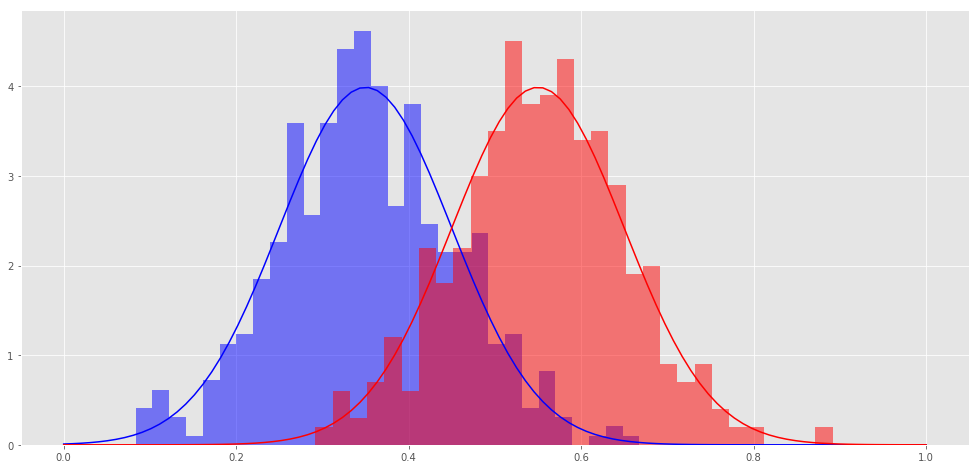

In [2]:
from scipy import stats

mu_0, sigma_0 = 0.35,0.1
mu_1, sigma_1 = 0.55,0.1
n=500

negativesScores = np.random.normal(mu_0, sigma_0,n)
positivesScores = np.random.normal(mu_1, sigma_1,n)

plt.figure(figsize=(17,8))
t = np.linspace(0,1,100)
plt.hist(negativesScores,bins=30,color='blue',alpha=0.5,density=True)
plt.hist(positivesScores,bins=30,color='red',alpha=0.5,density=True)
plt.plot(t,stats.norm.pdf(t, mu_0, sigma_0),color='Blue')
plt.plot(t,stats.norm.pdf(t, mu_1, sigma_1),color='Red')
plt.show()

In [3]:
from sklearn.metrics import precision_recall_curve

prCurve = precision_recall_curve([0]*n+[1]*n,\
                list(negativesScores)+list(positivesScores))